In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns   
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier 
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.ensemble import VotingClassifier, BaggingClassifier, RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
import joblib

In [2]:
df = pd.read_csv('diabetes_prediction_dataset.csv')

In [3]:
df.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


In [4]:
df.shape

(100000, 9)

# Exploratory Data Analysis

first I will if the dataset contains any null value

In [23]:
df.isnull().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB


No missing values in the dataset
Now i will explore every column one by one

1) Gender

In [25]:
df['gender'].value_counts()

gender
Female    58552
Male      41430
Other        18
Name: count, dtype: int64

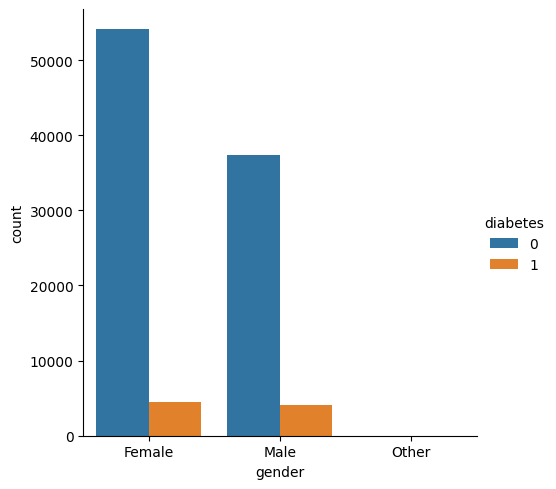

In [27]:
sns.catplot(data=df,x='gender',kind='count', hue='diabetes')

Things I infer for the gender column are:
* It has three classes male, female and others.
* It does not have strong correlation with target column.

2) Age

<Axes: xlabel='age', ylabel='Density'>

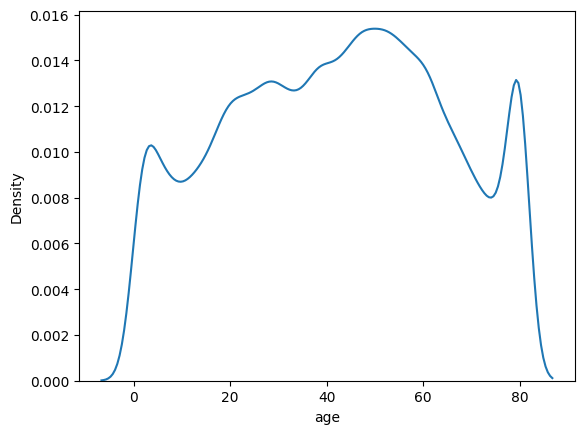

In [28]:
sns.kdeplot(df['age'], )

<Axes: xlabel='age', ylabel='diabetes'>

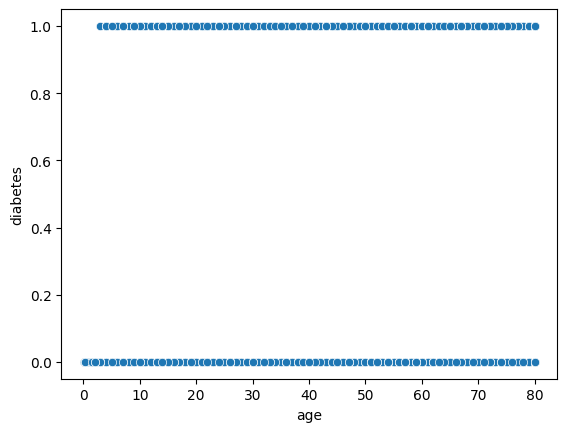

In [29]:
sns.scatterplot(data=df,x='age',y='diabetes')

<Axes: xlabel='age'>

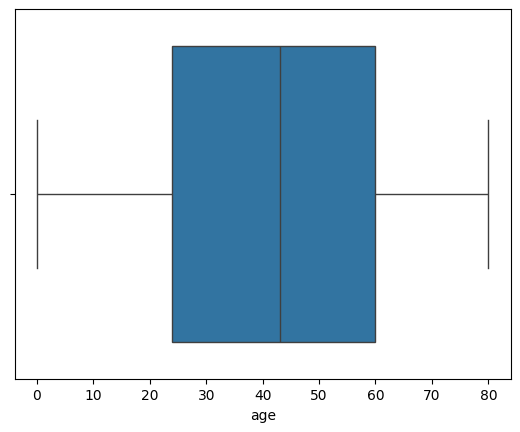

In [33]:
sns.boxplot(data=df,x='age')

Things I infer for the age column are:
* It does not follows any distribution.
* It does not have strong correlation with target column.

3) hypertension

In [35]:
df['hypertension'].value_counts()   

hypertension
0    92515
1     7485
Name: count, dtype: int64

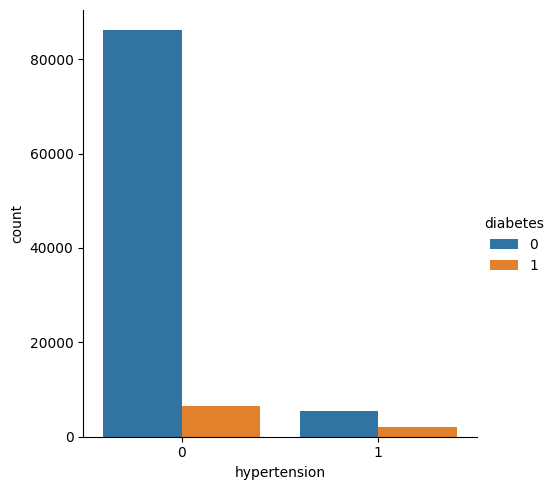

In [38]:
sns.catplot(data=df,x='hypertension',kind='count', hue='diabetes')

Things I infer for the hypertension column are:
* It has classes 1(having hypertension) , 0(no hypertension).
* Person having hypertension have more chances of having diabetes.

4) Heart Disease

In [39]:
df['heart_disease'].value_counts()

heart_disease
0    96058
1     3942
Name: count, dtype: int64

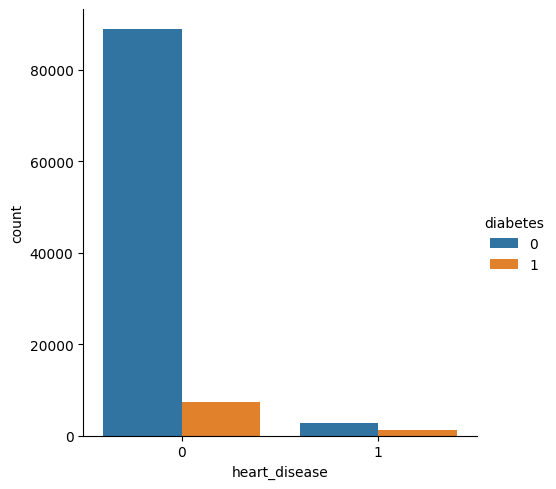

In [40]:
sns.catplot(data=df,x='heart_disease',kind='count', hue='diabetes')

Things I infer for the heart_disease column are:
* It has classes 1(having heart disease) , 0(no heartdisease).
* Person having heartdisease have more chances of having diabetes.

5) Smoking History

In [41]:
df['smoking_history'].value_counts()    

smoking_history
No Info        35816
never          35095
former          9352
current         9286
not current     6447
ever            4004
Name: count, dtype: int64

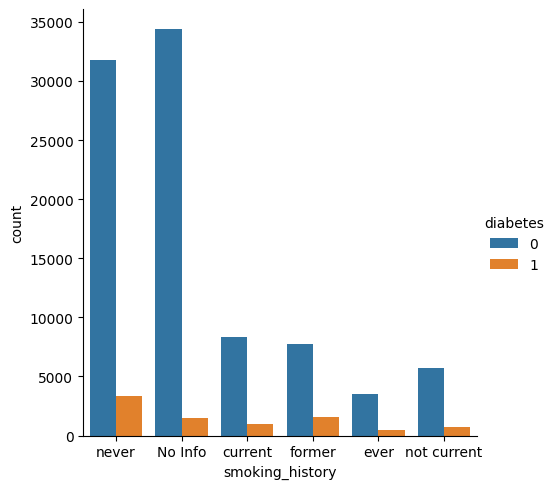

In [42]:
sns.catplot(data=df,x='smoking_history',kind='count', hue='diabetes')

Things I infer for the smoking_history column are:
* It has no clear correlation with target column.

6) BMI


<Axes: xlabel='bmi', ylabel='Density'>

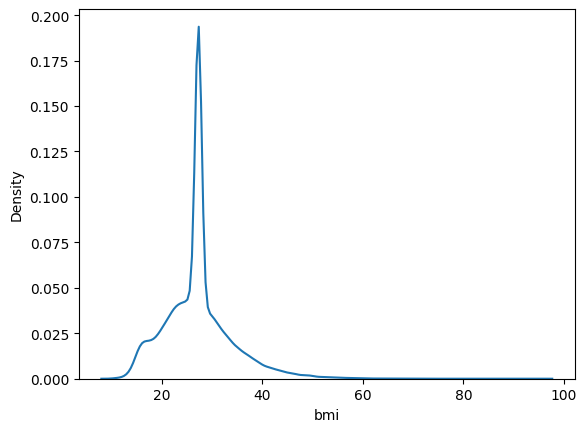

In [43]:
sns.kdeplot(df['bmi'], )

<Axes: xlabel='bmi'>

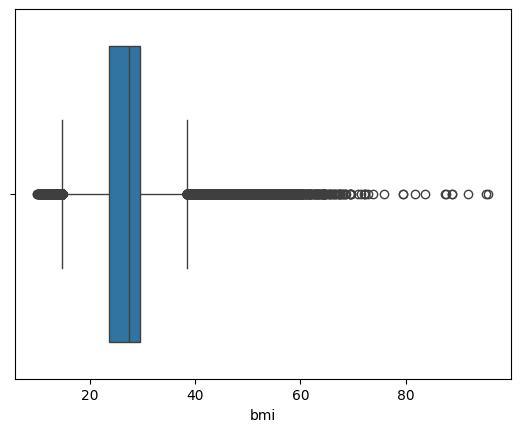

In [51]:
sns.boxplot(data=df,x='bmi')

<Axes: xlabel='bmi', ylabel='diabetes'>

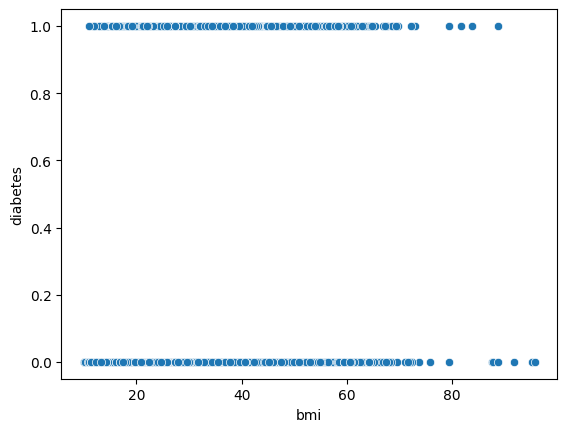

In [44]:
sns.scatterplot(data=df,x='bmi',y='diabetes')

Things I infer for the bmi column are:
* It has no clear correlation with target column.
* It has outliers

7) hba1c level

<Axes: xlabel='HbA1c_level', ylabel='Density'>

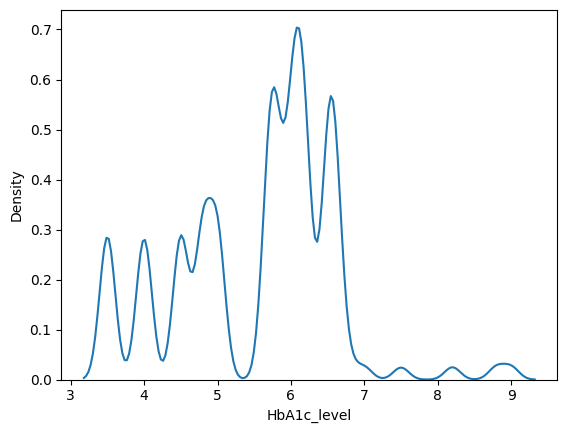

In [45]:
sns.kdeplot(df['HbA1c_level'])

<Axes: xlabel='HbA1c_level'>

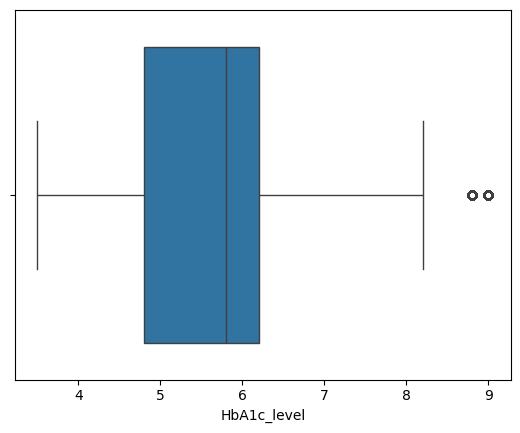

In [50]:
sns.boxplot(data=df,x='HbA1c_level')

<Axes: xlabel='HbA1c_level', ylabel='diabetes'>

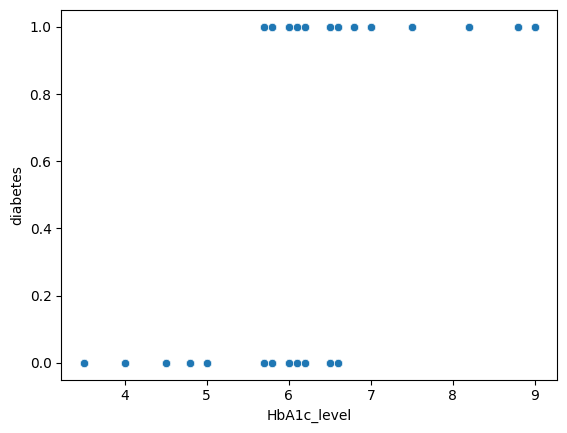

In [46]:
sns.scatterplot(data=df,x='HbA1c_level',y='diabetes')

Things I infer for the hba1c level column are:
* Higher the level higher the chance of diabetes.

8) blood glucose level


<Axes: xlabel='blood_glucose_level', ylabel='Density'>

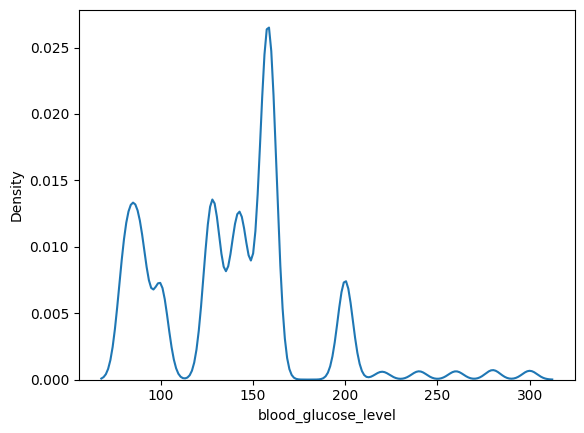

In [47]:
sns.kdeplot(df['blood_glucose_level'])

<Axes: xlabel='blood_glucose_level'>

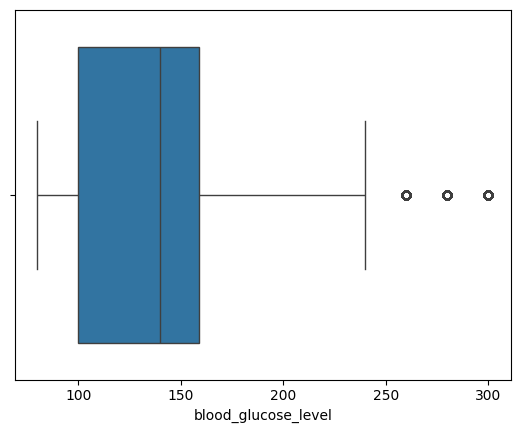

In [49]:
sns.boxplot(data=df,x='blood_glucose_level')

<Axes: xlabel='blood_glucose_level', ylabel='diabetes'>

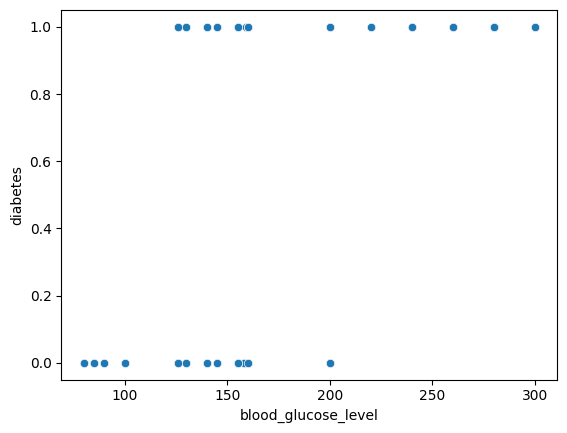

In [48]:
sns.scatterplot(data=df,x='blood_glucose_level',y='diabetes')

Things I infer for blood glucose level column are:
* Higher the level higher the chance of diabetes.

Now i will find how many outliers are there in bmi column

In [5]:
q3 = np.quantile(df['bmi'], 0.75)
q1 = np.quantile(df['bmi'], 0.25)
iqr = q3 - q1

lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

df = df[(df['bmi'] > lower_bound) & (df['bmi'] < upper_bound)]

In [6]:
df.shape

(92914, 9)

# Model Training 

In [7]:
df.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


In [8]:
X = df.drop('diabetes',axis=1)
y = df['diabetes']

In [9]:
X.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level
0,Female,80.0,0,1,never,25.19,6.6,140
1,Female,54.0,0,0,No Info,27.32,6.6,80
2,Male,28.0,0,0,never,27.32,5.7,158
3,Female,36.0,0,0,current,23.45,5.0,155
4,Male,76.0,1,1,current,20.14,4.8,155


In [10]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: diabetes, dtype: int64

Splitting the data into training and testing

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

Creating a column transformer which applies the following preprocessing steps:
* StandardScaler on all numeric column
* OneHotEncoding the smoking_history_column
* OrdinalEncoding on gender column

In [12]:
preprocessing = ColumnTransformer(transformers=[
    ('num', StandardScaler(), [1,2,3,5,6,7]),
    ('onehot', OneHotEncoder(),[4]),
    ('ordinal', OrdinalEncoder(),[0])
], remainder='passthrough')

In [13]:
pipe = Pipeline([
    ('preprocessing', preprocessing),
    ('model', LogisticRegression())
])

In [14]:
pipe.fit(X_train,y_train)
y_pred = pipe.predict(X_test)
print(pipe.score(X_train, y_train))
print(pipe.score(X_test, y_test))
print(confusion_matrix(y_test, y_pred, labels=[0,1]))
print(classification_report(y_test, y_pred))

0.9639600854871693
0.9644125560538117
[[25597   211]
 [  781  1286]]
              precision    recall  f1-score   support

           0       0.97      0.99      0.98     25808
           1       0.86      0.62      0.72      2067

    accuracy                           0.96     27875
   macro avg       0.91      0.81      0.85     27875
weighted avg       0.96      0.96      0.96     27875



In [15]:
pipe2 = Pipeline([
    ('preprocessing', preprocessing),
    ('model', DecisionTreeClassifier(criterion='entropy', splitter='random'))
])

In [16]:
pipe2.fit(X_train,y_train)
y_pred = pipe2.predict(X_test)
print(pipe2.score(X_train, y_train))
print(pipe2.score(X_test, y_test))
print(confusion_matrix(y_test, y_pred, labels=[0,1]))
print(classification_report(y_test, y_pred))

0.9992312304924738
0.9561973094170404
[[25152   656]
 [  565  1502]]
              precision    recall  f1-score   support

           0       0.98      0.97      0.98     25808
           1       0.70      0.73      0.71      2067

    accuracy                           0.96     27875
   macro avg       0.84      0.85      0.84     27875
weighted avg       0.96      0.96      0.96     27875



In [18]:
pipe2.named_steps['model'].get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'entropy',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'random_state': None,
 'splitter': 'random'}

In [17]:
estimators = [('lr',LogisticRegression()),('dt',DecisionTreeClassifier())]
pipe3 = Pipeline([
    ('preprocessing', preprocessing),
    ('model', VotingClassifier(estimators, voting='hard', weights=[1,2]))
])
pipe3.fit(X_train,y_train)

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num', StandardScaler(),
                                                  [1, 2, 3, 5, 6, 7]),
                                                 ('onehot', OneHotEncoder(),
                                                  [4]),
                                                 ('ordinal', OrdinalEncoder(),
                                                  [0])])),
                ('model',
                 VotingClassifier(estimators=[('lr', LogisticRegression()),
                                              ('dt', DecisionTreeClassifier())],
                                  weights=[1, 2]))])

In [18]:
print(pipe3.score(X_train, y_train))
print(pipe3.score(X_test, y_test))
y_pred = pipe3.predict(X_test)
print(confusion_matrix(y_test, y_pred, labels=[0,1]))
print(classification_report(y_test, y_pred))

0.9992312304924738
0.9552286995515695
[[25126   682]
 [  566  1501]]
              precision    recall  f1-score   support

           0       0.98      0.97      0.98     25808
           1       0.69      0.73      0.71      2067

    accuracy                           0.96     27875
   macro avg       0.83      0.85      0.84     27875
weighted avg       0.96      0.96      0.96     27875



In [19]:
pipe4 = Pipeline([
    ('preprocessing', preprocessing),
    ('model', BaggingClassifier())
])
pipe4.fit(X_train,y_train)

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num', StandardScaler(),
                                                  [1, 2, 3, 5, 6, 7]),
                                                 ('onehot', OneHotEncoder(),
                                                  [4]),
                                                 ('ordinal', OrdinalEncoder(),
                                                  [0])])),
                ('model', BaggingClassifier())])

In [20]:
print(pipe4.score(X_train, y_train))
print(pipe4.score(X_test, y_test))
y_pred = pipe4.predict(X_test)
print(confusion_matrix(y_test, y_pred, labels=[0,1]))
print(classification_report(y_test, y_pred))

0.9956795153677025
0.9720538116591928
[[25669   139]
 [  640  1427]]
              precision    recall  f1-score   support

           0       0.98      0.99      0.99     25808
           1       0.91      0.69      0.79      2067

    accuracy                           0.97     27875
   macro avg       0.94      0.84      0.89     27875
weighted avg       0.97      0.97      0.97     27875



In [27]:
param_grid = {
    'model__n_estimators': [50, 100,150],
    'model__max_samples': [0.2, 0.3, 0.4, 0.5],
    'model__bootstrap': [True, False],
}
grid = GridSearchCV(pipe4, param_grid, cv=5, n_jobs=-1)
grid.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessing',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('num',
                                                                         StandardScaler(),
                                                                         [1, 2,
                                                                          3, 5,
                                                                          6,
                                                                          7]),
                                                                        ('onehot',
                                                                         OneHotEncoder(),
                                                                         [4]),
                                                                        ('ordinal',
                                                                         OrdinalEncoder(),
                                                                         [0])])),
                                       ('model', BaggingClassifier())]),
             n_jobs=-1,
             param_grid={'model__bootstrap': [True, False],
                         'model__max_samples': [0.2, 0.3, 0.4, 0.5],
                         'model__n_estimators': [50, 100, 150]})

In [70]:
X_test.iloc[1045,:]

gender                 Female
age                      19.0
hypertension                0
heart_disease               0
smoking_history         never
bmi                     22.34
HbA1c_level               5.8
blood_glucose_level       155
Name: 23888, dtype: object

In [71]:
y_test.iloc[1045,]

0

In [28]:
print(grid.score(X_train, y_train))
print(grid.score(X_test, y_test))
y_pred = grid.predict(X_test)
print(confusion_matrix(y_test, y_pred, labels=[0,1]))
print(classification_report(y_test, y_pred))
print(grid.best_params_)

0.9774289272590292
0.9749955156950673
[[25776    32]
 [  665  1402]]
              precision    recall  f1-score   support

           0       0.97      1.00      0.99     25808
           1       0.98      0.68      0.80      2067

    accuracy                           0.97     27875
   macro avg       0.98      0.84      0.89     27875
weighted avg       0.98      0.97      0.97     27875

{'model__bootstrap': False, 'model__max_samples': 0.2, 'model__n_estimators': 150}


In [54]:
for i in range(len(grid.best_estimator_.named_steps['model'].estimators_)):
    print(grid.best_estimator_.named_steps['model'].estimators_[i].get_depth())

28
27
29
30
26
28
26
25
28
26
25
28
31
28
27
27
26
27
22
23
28
24
26
29
24
29
23
27
25
32
26
23
28
27
27
28
26
29
31
28
29
27
27
27
28
27
22
26
25
26
24
26
27
25
28
26
30
27
25
28
26
24
30
23
30
28
32
26
29
31
26
24
25
27
26
23
28
26
26
29
27
28
26
28
24
26
31
24
30
27
24
28
25
24
29
24
26
25
26
30
26
24
33
29
28
26
27
27
25
24
26
24
27
26
26
28
29
23
25
26
23
28
26
25
29
29
27
30
26
26
25
24
26
28
27
32
23
29
27
33
29
29
26
35
26
27
28
31
26
26


In [56]:
joblib.dump(grid.best_estimator_, 'model.pkl')

['model.pkl']

In [21]:
pipe5 = Pipeline([
    ('preprocessing', preprocessing),
    ('model', RandomForestClassifier())
])
pipe5.fit(X_train,y_train)

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num', StandardScaler(),
                                                  [1, 2, 3, 5, 6, 7]),
                                                 ('onehot', OneHotEncoder(),
                                                  [4]),
                                                 ('ordinal', OrdinalEncoder(),
                                                  [0])])),
                ('model', RandomForestClassifier())])

In [22]:
print(pipe5.score(X_train, y_train))
print(pipe5.score(X_test, y_test))
y_pred = pipe5.predict(X_test)
print(confusion_matrix(y_test, y_pred, labels=[0,1]))
print(classification_report(y_test, y_pred))

0.9992312304924738
0.9736681614349776
[[25733    75]
 [  659  1408]]
              precision    recall  f1-score   support

           0       0.98      1.00      0.99     25808
           1       0.95      0.68      0.79      2067

    accuracy                           0.97     27875
   macro avg       0.96      0.84      0.89     27875
weighted avg       0.97      0.97      0.97     27875



In [23]:
x_pred = pipe5.predict(X_train)
print(classification_report(y_train, x_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     60084
           1       1.00      0.99      0.99      4955

    accuracy                           1.00     65039
   macro avg       1.00      1.00      1.00     65039
weighted avg       1.00      1.00      1.00     65039



In [24]:
param_grid = {
    'model__n_estimators': [50, 100,150],
    'model__bootstrap': [True, False],
    'model__class_weight': ['balanced', 'balanced_subsample'],
    'model__max_samples': [0.4, 0.5, 0.6, 0.7]
}
grid = GridSearchCV(pipe5, param_grid, cv=5, n_jobs=-1)
grid.fit(X_train, y_train)


c:\Python\Lib\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
120 fits failed out of a total of 240.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
120 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Python\Lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Python\Lib\site-packages\sklearn\base.py", line 1473, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Python\Lib\site-packages\sklearn\pipeline.py", line 473, in fit
    self._final_estimator.fit(Xt, y, **last_step_params["fit"])
  File "c:\Python\Lib\

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessing',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('num',
                                                                         StandardScaler(),
                                                                         [1, 2,
                                                                          3, 5,
                                                                          6,
                                                                          7]),
                                                                        ('onehot',
                                                                         OneHotEncoder(),
                                                                         [4]),
                                                                        ('ordinal',
                                                                         OrdinalEncoder(),
                                                                         [0])])),
                                       ('model', RandomForestClassifier())]),
             n_jobs=-1,
             param_grid={'model__bootstrap': [True, False],
                         'model__class_weight': ['balanced',
                                                 'balanced_subsample'],
                         'model__max_samples': [0.4, 0.5, 0.6, 0.7],
                         'model__n_estimators': [50, 100, 150]})

In [28]:
grid.best_params_

{'model__bootstrap': True,
 'model__class_weight': 'balanced_subsample',
 'model__max_samples': 0.4,
 'model__n_estimators': 100}

In [24]:
grid.best_estimator_[1]

RandomForestClassifier(class_weight='balanced', max_samples=0.4,
                       n_estimators=150)

In [25]:
scores = cross_val_score(grid.best_estimator_, X_train, y_train, cv=5)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Accuracy: 0.97 (+/- 0.00)


In [26]:
scores = cross_val_score(grid.best_estimator_, X_test, y_test, cv=5)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Accuracy: 0.98 (+/- 0.00)


In [27]:
print(grid.score(X_train, y_train))
print(grid.score(X_test, y_test))
y_pred = grid.best_estimator_.predict(X_test)
print(confusion_matrix(y_test, y_pred, labels=[0,1]))
print(classification_report(y_test, y_pred))

0.9809345162133489
0.9750313901345291
[[25775    33]
 [  663  1404]]
              precision    recall  f1-score   support

           0       0.97      1.00      0.99     25808
           1       0.98      0.68      0.80      2067

    accuracy                           0.98     27875
   macro avg       0.98      0.84      0.89     27875
weighted avg       0.98      0.98      0.97     27875



In [29]:
joblib.dump(grid.best_estimator_, 'new_model.pkl')

['new_model.pkl']

In [46]:
X_test.iloc[736, :]

gender                   Male
age                      80.0
hypertension                1
heart_disease               0
smoking_history        former
bmi                     24.42
HbA1c_level               6.0
blood_glucose_level       160
Name: 46218, dtype: object

In [45]:
y_test.iloc[736]

1

In [39]:
y_test[y_test == 1]

45830    1
97110    1
3233     1
47917    1
58687    1
        ..
19531    1
63618    1
36481    1
40263    1
30251    1
Name: diabetes, Length: 2067, dtype: int64

In [15]:
pipe5[1]

RandomForestClassifier()

In [16]:
y_train.value_counts()

diabetes
0    60084
1     4955
Name: count, dtype: int64